# _**Movie EDA**_ #

In [1]:
import numpy as np
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("../data/movies_metadata.csv", low_memory=False)

In [4]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [6]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

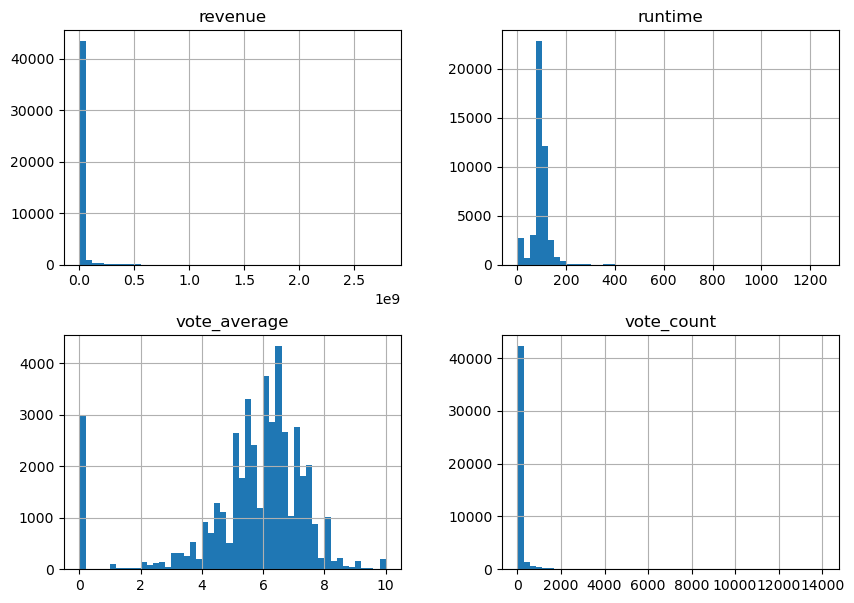

In [7]:
movies.hist(bins=50, figsize=(10, 7))
plt.show()

In [8]:
def parse_json_safe(text):
    if text is None or pd.isna(text):
        return np.nan
    if isinstance(text, (list, dict)):
        return text
    try:
        return json.loads(str(text))
    except (json.JSONDecodeError, TypeError):
        return np.nan

In [9]:
def extract_first_values(cell, key="name", max_items=3):
    data = parse_json_safe(cell)
    if not isinstance(data, list) or len(data) == 0:
        return np.nan

    values = [item.get(key) for item in data[:max_items] if isinstance(item, dict)]
    return values if values else np.nan

In [10]:
def extract_single_value(cell, key="name"):
    data = parse_json_safe(cell)
    if isinstance(data, dict):
        return data.get(key, np.nan)
    elif isinstance(data, list) and len(data) > 0:
        return data[0].get(key, np.nan) if isinstance(data[0], dict) else np.nan
    return np.nan

In [11]:
def extract_as_string(cell, key="name", separator=", "):
    data = parse_json_safe(cell)
    if not isinstance(data, list):
        return np.nan

    values = [str(item.get(key)) for item in data if isinstance(item, dict) and key in item]
    return separator.join(values) if values else np.nan

In [16]:
import json
import numpy as np
import pandas as pd

def extract_text_values(cell, key="name", separator=", "):
    if cell is None or pd.isna(cell):
        return np.nan

    if isinstance(cell, (list, dict)):
        data = cell
    else:
        try:
            data = json.loads(str(cell))
        except (json.JSONDecodeError, TypeError, ValueError):
            return np.nan

    if isinstance(data, dict):
        return data.get(key, np.nan)

    if isinstance(data, list) and len(data) > 0:
        values = [str(item.get(key)) for item in data if isinstance(item, dict) and key in item]
        if not values:
            return np.nan
        return values[0] if len(values) == 1 else separator.join(values)

    return np.nan

In [13]:
movies['name_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="name"))

movies['id_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="id"))

movies['poster_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="poster_path"))

movies['backdrop_path_belongs_to_collection'] = movies['belongs_to_collection'].apply(lambda x: extract_single_value(x, key="backdrop_path"))


In [17]:
movies['name_genres'] = movies['genres'].apply(lambda x: extract_text_values(x, key="name"))
movies['id_genres'] = movies['genres'].apply(lambda x: extract_text_values(x, key="id"))

In [18]:
movies['name_production_countries'] = movies['production_countries'].apply(lambda x: extract_text_values(x, key="name"))
movies['iso_3166_1_production_companies'] = movies['production_countries'].apply(lambda x: extract_text_values(x, key="iso_3166_1"))

In [19]:
movies['name_production_companies'] = movies['production_companies'].apply(lambda x: extract_text_values(x, key="name"))
movies['id_production_companies'] = movies['production_companies'].apply(lambda x: extract_text_values(x, key="id"))

In [20]:
movies.drop(columns=["production_countries", "production_companies", "genres", "spoken_languages", "homepage", "poster_path"], inplace=True)